# Test SVM on components/price data

In [1]:
import pandas as pd
import numpy as np

Define data :
- Data contains products and its prices
- A product is composed of `nb_components` components  
- Each component has its price, defined in `price_per_component` and which is not exposed for learning
- Product's price is computed as a sum on components of the component price multiplied on number of elements of the component: 

```
price(product=p) = sum( price(component=c) * nb_elements(component=c), c in components(product=p) )
```

We want to predict a price a product.

*Conclusions:* 
- Performance is better if `nb_components` is not very large
- Price values should be `log` scaled between (0, 100]
- Data better to std normalized for SVR

In [2]:
nb_components = 500
nb_samples = 10000
# This is what we need to predict
price_per_component = np.array([i+1 for i in range(nb_components)])
data = np.random.randint(-3, 3, size=[nb_samples, nb_components]) 
data[data < 0] = 0
sums = np.sum(data, axis=1)
data[sums == 0, np.random.randint(nb_components)] = 1
# Add a random element if only one component is found
sums = np.sum(data, axis=1)
data[sums == 1, np.random.randint(nb_components)] += 1

In [3]:
columns = ['c_%s' % i for i in range(nb_components)]
prices = np.zeros((nb_samples))
prices[:] = np.dot(data[:, ...], price_per_component)
df = pd.DataFrame(data=data, columns=columns)
df['price'] = pd.Series(prices)

Display input data

In [4]:
print "Prices of components : ", price_per_component
df

Prices of components :  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 24

,c_0,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,...,c_491,c_492,c_493,c_494,c_495,c_496,c_497,c_498,c_499,price
0,1,2,0,2,1,2,0,0,0,2,...,0,0,0,0,1,0,0,2,0,57142.0
1,0,0,0,1,1,2,1,0,0,0,...,0,0,1,2,2,0,1,0,0,67391.0
2,0,1,0,2,0,0,0,0,2,1,...,0,2,1,1,0,1,1,2,0,67778.0
3,0,0,0,0,0,2,0,1,0,1,...,0,0,0,0,0,0,0,0,0,62627.0
4,0,2,0,0,0,0,0,0,0,0,...,0,2,2,0,2,0,0,0,0,66645.0
5,0,2,2,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,2,70268.0
6,1,0,0,0,0,0,0,0,0,0,...,0,2,2,2,0,0,0,0,2,62072.0
7,0,0,0,0,2,1,0,0,1,0,...,0,0,2,1,0,0,0,0,0,62590.0
8,0,0,1,0,2,0,0,0,2,0,...,2,0,0,1,1,2,2,0,0,70787.0
9,0,0,0,0,2,1,0,0,0,0,...,1,0,2,0,1,1,1,2,0,69294.0


In [5]:
assert len(df['price'][df['price'] < 1]) == 0, "Zero price is detected"

Train and test data

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

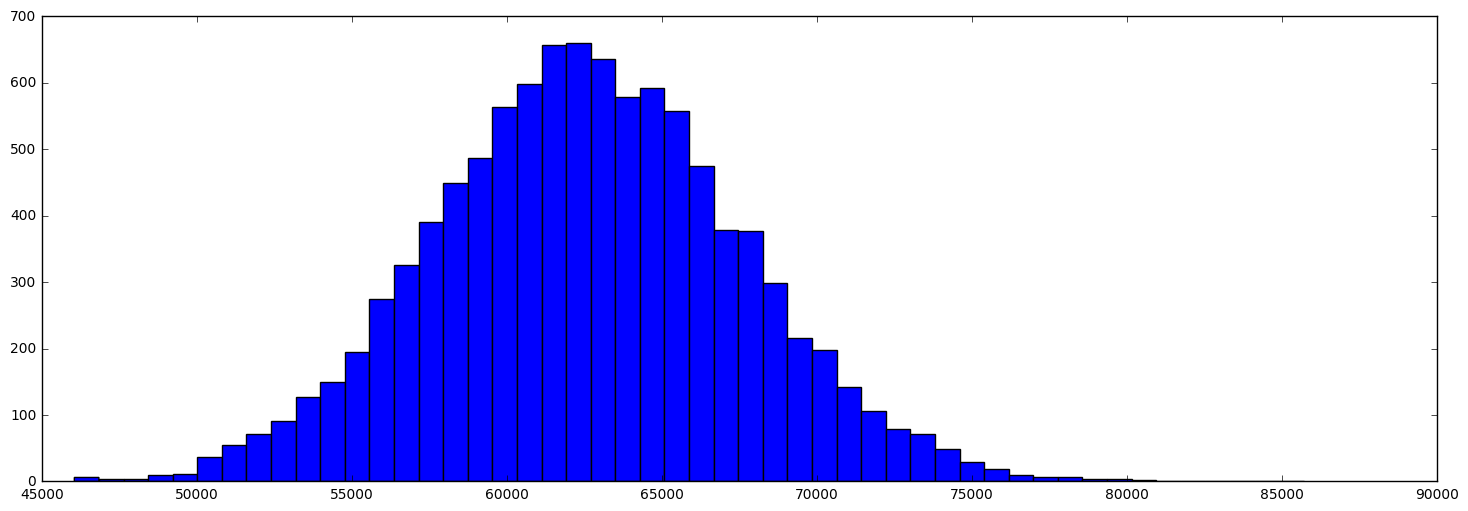

In [7]:
plt.figure(figsize=(18, 6))
out = plt.hist(df['price'], bins=50)

In [8]:
df['logprice'] = df['price'].apply(lambda x: np.log(1 + x))

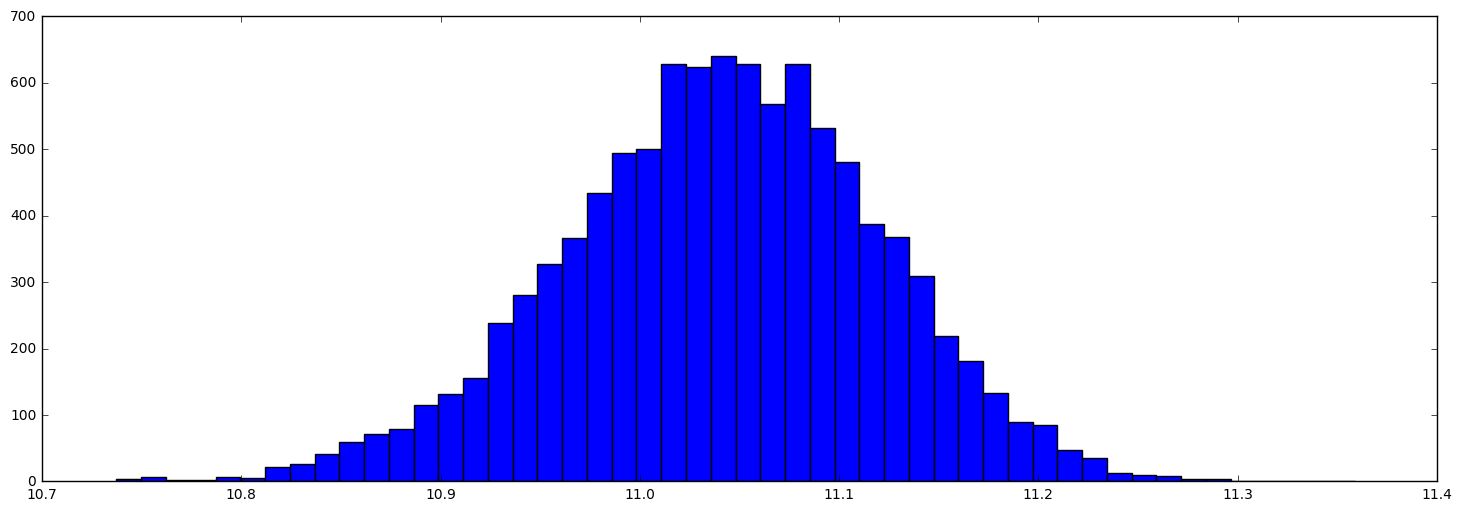

In [9]:
plt.figure(figsize=(18, 6))
out = plt.hist(df['logprice'], bins=50)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [11]:
X0 = df.drop(['price', 'logprice'], axis=1)
y = df['price'] 
ylog = df['logprice']

X = StandardScaler().fit_transform(X0)
X_train, X_test, X0_train, X0_test, y_train, y_test, ylog_train, ylog_test = train_test_split(X, X0, y, ylog, test_size=0.75)

In [12]:
X0.describe()

,c_0,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,...,c_490,c_491,c_492,c_493,c_494,c_495,c_496,c_497,c_498,c_499
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.495800,0.506400,0.513200,0.500300,0.472900,0.493800,0.50910,0.483200,0.510400,0.497200,...,0.495900,0.500400,0.480200,0.503000,0.508900,0.504300,0.508600,0.507100,0.504900,0.502900
std,0.763047,0.764341,0.774135,0.761747,0.747343,0.762509,0.77018,0.752844,0.769514,0.759901,...,0.762785,0.765675,0.753435,0.765931,0.770701,0.762391,0.765888,0.764858,0.772292,0.762266
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [13]:
pd.DataFrame(data=X).describe()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,...,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,-3.055334e-17,1.776357e-17,2.415845e-17,4.121148e-17,-3.126388e-17,-3.375078e-17,4.849454e-17,-4.263256e-17,4.583001e-17,4.654055e-17,...,-9.947598e-18,-1.323386e-17,1.030287e-16,-1.563194e-17,1.207923e-17,7.496226e-17,-6.359357e-17,5.897505e-17,-5.151435e-17,-1.065814e-17
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,...,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-6.497960e-01,-6.625645e-01,-6.629662e-01,-6.568129e-01,-6.328068e-01,-6.476314e-01,-6.610478e-01,-6.418647e-01,-6.633094e-01,-6.543283e-01,...,-6.501499e-01,-6.535735e-01,-6.373792e-01,-6.567503e-01,-6.603409e-01,-6.615049e-01,-6.640988e-01,-6.630318e-01,-6.538006e-01,-6.597763e-01
25%,-6.497960e-01,-6.625645e-01,-6.629662e-01,-6.568129e-01,-6.328068e-01,-6.476314e-01,-6.610478e-01,-6.418647e-01,-6.633094e-01,-6.543283e-01,...,-6.501499e-01,-6.535735e-01,-6.373792e-01,-6.567503e-01,-6.603409e-01,-6.615049e-01,-6.640988e-01,-6.630318e-01,-6.538006e-01,-6.597763e-01
50%,-6.497960e-01,-6.625645e-01,-6.629662e-01,-6.568129e-01,-6.328068e-01,-6.476314e-01,-6.610478e-01,-6.418647e-01,-6.633094e-01,-6.543283e-01,...,-6.501499e-01,-6.535735e-01,-6.373792e-01,-6.567503e-01,-6.603409e-01,-6.615049e-01,-6.640988e-01,-6.630318e-01,-6.538006e-01,-6.597763e-01
75%,6.608050e-01,6.458172e-01,6.288620e-01,6.560252e-01,7.053340e-01,6.638944e-01,6.374157e-01,6.864977e-01,6.362779e-01,6.616980e-01,...,6.609005e-01,6.525286e-01,6.899411e-01,6.489163e-01,6.372439e-01,6.502240e-01,6.416401e-01,6.444654e-01,6.411104e-01,6.521670e-01
max,1.971406e+00,1.954199e+00,1.920690e+00,1.968863e+00,2.043475e+00,1.975420e+00,1.935879e+00,2.014860e+00,1.935865e+00,1.977724e+00,...,1.971951e+00,1.958631e+00,2.017262e+00,1.954583e+00,1.934829e+00,1.961953e+00,1.947379e+00,1.951963e+00,1.936021e+00,1.964110e+00


In [14]:
# Mean Absolute Percentage Error
def mape_error(y_true, y_pred, **kwards): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

Single run

In [15]:
svr1 = SVR(kernel='linear')
svr1.fit(X_train, y_train)
score = svr1.score(X_train, y_train)
print score
res0 = svr1.predict(X_train)
res1 = svr1.predict(X_test)
print mape_error(y_train, res0)
print mape_error(y_test, res1)

0.668272121199
3.51091342352
3.9141491778


In [16]:
print y_test.tolist()[:10]
print res1[:10]


[66553.0, 65064.0, 73431.0, 58338.0, 66414.0, 58051.0, 71590.0, 68765.0, 64998.0, 66711.0]
[ 64056.16242985  62621.90485177  67390.16869732  61463.23640647
  63005.56589116  61190.52783176  65922.31215012  64949.70590306
  63888.10908606  63996.32575944]


In [17]:
svr1 = SVR(kernel='linear')
svr1.fit(X_train, ylog_train)
score = svr1.score(X_train, ylog_train)
print score
res0 = svr1.predict(X_train)
res1 = svr1.predict(X_test)
print mape_error(ylog_train, res0)
print mape_error(ylog_test, res1)

0.550106483394
0.39942991045
0.407055392442


In [18]:
print ylog_test.tolist()[:10]
print res1[:10]

[11.105768927201085, 11.083142049210858, 11.204115086898927, 10.974026102376623, 11.103678213566603, 10.969094439590254, 11.178724646724019, 11.138464715724755, 11.082127164144046, 11.108140125766822]
[ 11.05977478  11.03727219  11.0935596   11.00600842  11.03224316
  10.96175338  11.08626539  11.04774864  11.05167543  11.06237943]


In [27]:
svr1 = SVR(kernel='linear', C=2)
svr1.fit(X_train, y_train)
score = svr1.score(X_train, y_train)
print score
res0 = svr1.predict(X_train)
res1 = svr1.predict(X_test)
print mape_error(y_train, res0)
print mape_error(y_test, res1)

0.942644228899
1.39684093267
1.74151604968


In [29]:
print y_test.tolist()[:10]
print res1[:10]

[66553.0, 65064.0, 73431.0, 58338.0, 66414.0, 58051.0, 71590.0, 68765.0, 64998.0, 66711.0]
[ 65494.80879888  64021.40154958  71149.05567579  59800.59249261
  64360.29532321  59484.67719232  69302.77091082  67239.23376877
  65046.13278368  65652.16371437]


In [20]:
svr2 = SVR(kernel='linear')
svr2.fit(X0_train, y_train)
score = svr2.score(X0_train, y_train)
print score
res0 = svr2.predict(X0_train)
res2 = svr2.predict(X0_test)
print mape_error(y_train, res0)
print mape_error(y_test, res2)

0.450024350503
4.61379355445
4.90077127999


In [21]:
print y_test.tolist()[:10]
print res2[:10]

[66553.0, 65064.0, 73431.0, 58338.0, 66414.0, 58051.0, 71590.0, 68765.0, 64998.0, 66711.0]
[ 63397.6856717   62522.51064774  65505.90924063  61974.80246412
  62760.17792908  62117.27560092  64462.65319409  63960.10015753
  63416.4749788   63386.4491024 ]


Cross validation scoring

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

In [23]:
clf = SVR(kernel='linear', C=2)
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring=make_scorer(mape_error))
print scores      
print scores.mean(), scores.std()

[ 2.90754557  2.63908659  2.75054745  2.87416771  2.71187378]
2.77664421922 0.100443364122


In [24]:
clf = SVR(kernel='linear', C=2)
scores = cross_val_score(clf, X_train, ylog_train, cv=5, scoring=make_scorer(mape_error))
print scores      
print scores.mean(), scores.std()

[ 0.44104397  0.42117669  0.41609844  0.43814359  0.43396165]
0.430084866888 0.00974730761888


In [25]:
clf = SVR(kernel='linear', C=2)
scores = cross_val_score(clf, X0_train, y_train, cv=5, scoring=make_scorer(mape_error))
print scores      
print scores.mean(), scores.std()

[ 4.4095854   4.01077993  4.17350547  4.29848208  4.16342863]
4.21115630026 0.134793250709
